## Getting Support Figures

In this notebook, we'll just post the code used to obtain figures that will be relevant for the MSc Thesis that do not use, in any regard, the educational dataset.

In [1]:
#importar packages para manipulação dos diretórios
import os
import glob

#packages standard para tratamento de dados
import pandas as pd
import numpy as np
import scipy as sc

#visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#packages geográficos
import requests

sns.set()
%matplotlib inline

#### Uploading Files

In [2]:
#AVISO: NÃO MUDAR LOCALIZAÇÕES DOS SCRIPTS OU FICHEIROS

historico = pd.read_csv('../Data/EDM_LA_nbr of papers.csv', sep = ';')

#Resultados
resultados = pd.read_excel("../Data/Modeling Stage/Results/IMS/Model_Results.xlsx", 
                               sheet_name = None)

In [3]:
resultados

{'At risk students':    Moment of prediction                            Model  Accuracy  \
 0          10% Duration          Traditional Classifiers  0.802000   
 1          10% Duration                              KNN  0.786000   
 2          10% Duration                               LR  0.799000   
 3          10% Duration                               NB  0.542000   
 4          10% Duration                             CART  0.779000   
 5          10% Duration                              SVM  0.799000   
 6          10% Duration                             LSTM  0.792882   
 7          10% Duration  Traditional Classifiers - SMOTE  0.733000   
 8          10% Duration                     LSTM - SMOTE  0.587216   
 9          25% Duration          Traditional Classifiers  0.804000   
 10         25% Duration                              KNN  0.799000   
 11         25% Duration                               LR  0.799000   
 12         25% Duration                               NB

#### Figure 1: Evolution of Published Works in EDM and LA

In [4]:
# setting up for figure
# x_axis = historico['Year'] 
# LA = historico['Learning Analytics']
# EDM = historico['Educational Data Mining']

# fig = go.Figure()

# fig.add_trace(
#     go.Bar(
#         x= x_axis,
#         y= LA,
#         name='<b>Learning Analytics</b>',
#         marker_color='rgb(92, 102, 108)'
#         )
#     )

# fig.add_trace(
#     go.Bar(
#         x=x_axis,
#         y=EDM,
#         name='<b>Educational Data Mining</b>',
#         marker_color='rgb(191, 215, 47)'
#         )
#     )

# fig.update_layout(
#     font=dict(
#         family="Calibri, serif",
#         color = 'black'),
#     xaxis_tickfont_size=14,
#     xaxis_title = '<b>Year</b>',
#     yaxis=dict(
#         title='<b>Number of Research Papers</b>',
#         titlefont_size=16,
#         tickfont_size=14,
#     ),
#     legend=dict(
#         x=0,
#         y=1.0,
#         bgcolor='rgba(0, 0, 0, 0)',
#         bordercolor='rgba(255, 255, 255, 0)'
#     ),
#     barmode='group',
#     bargroupgap=0.1 # gap between bars of the same location coordinate.
# )

# fig.show()

# fig.write_image("../Images/figure_1.png", )            
# fig.show()

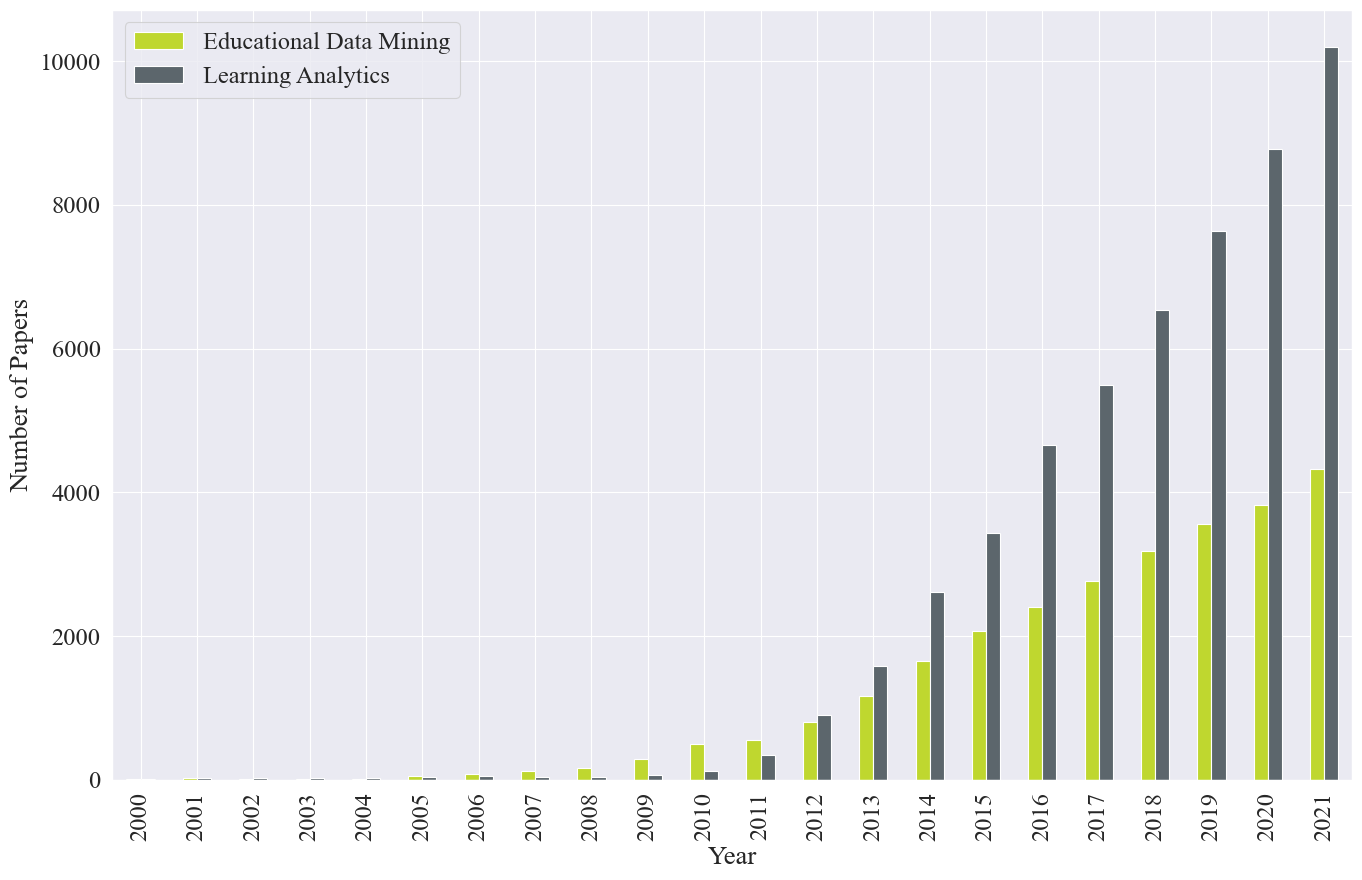

In [5]:
#set seaborn plotting aesthetics
#settub
sns.set_theme(context='paper', font='Times New Roman', rc={"figure.figsize":(16, 10)}, font_scale=2)

ax = historico.plot(kind = 'bar', x = 'Year', color=['#BFD72F', '#5C666C'], )

ax.set(ylabel = 'Number of Papers',
      xlabel = 'Year')

# adding text annotations
#plt.text(8, 500, "1st EDM\nConference", horizontalalignment='center', size='medium', color='#BFD72F', weight='bold')
#plt.text(11, 900, "1st LA\nConference", horizontalalignment='center', size='medium', color='#5C666C', weight='bold')
ax.legend(loc='upper left')

#plt.savefig("../Images/figure_1_tnr.png", dpi=300)

The following cell results include results in our different performance metrics

In [6]:
#editing

resultados['At risk students']['State'] = 'Students at risk'
resultados['High performing students']['State'] = 'High performing students'

IMS_results = pd.concat([resultados['At risk students'], resultados['High performing students']])

In [7]:
test = IMS_results.melt(id_vars = ['Moment of prediction', 'Model', 'State'], value_vars=['AUROC', 'Accuracy',  
                                                                                                   'Recall', 'Precision'],
                                                                                           var_name = 'Performance Metric',
                                                                                           value_name = 'Value')

test = test[(test['Moment of prediction'] != '100% Duration') & (test['Model'].isin(['Best Static Model',
                                                                                    'Best Static Model - SMOTE',
                                                                                    'LSTM',
                                                                                    'LSTM - SMOTE']))]

test['Performance Metric'] = test['Performance Metric'].str.replace('AUROC', 'AUC') 

In [8]:
test = test.sort_values(["Moment of prediction", "Model"])

In [9]:
colors = ["#bfd72f", "#5C666C", "#335000", '#000c12']

C:\Users\Kisshin\Conda\anaconda3\envs\deep_torch\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Kisshin\Conda\anaconda3\envs\deep_torch\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Kisshin\Conda\anaconda3\envs\deep_torch\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Kisshin\Conda\anaconda3\envs\deep_torch\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Kisshin\Conda\a

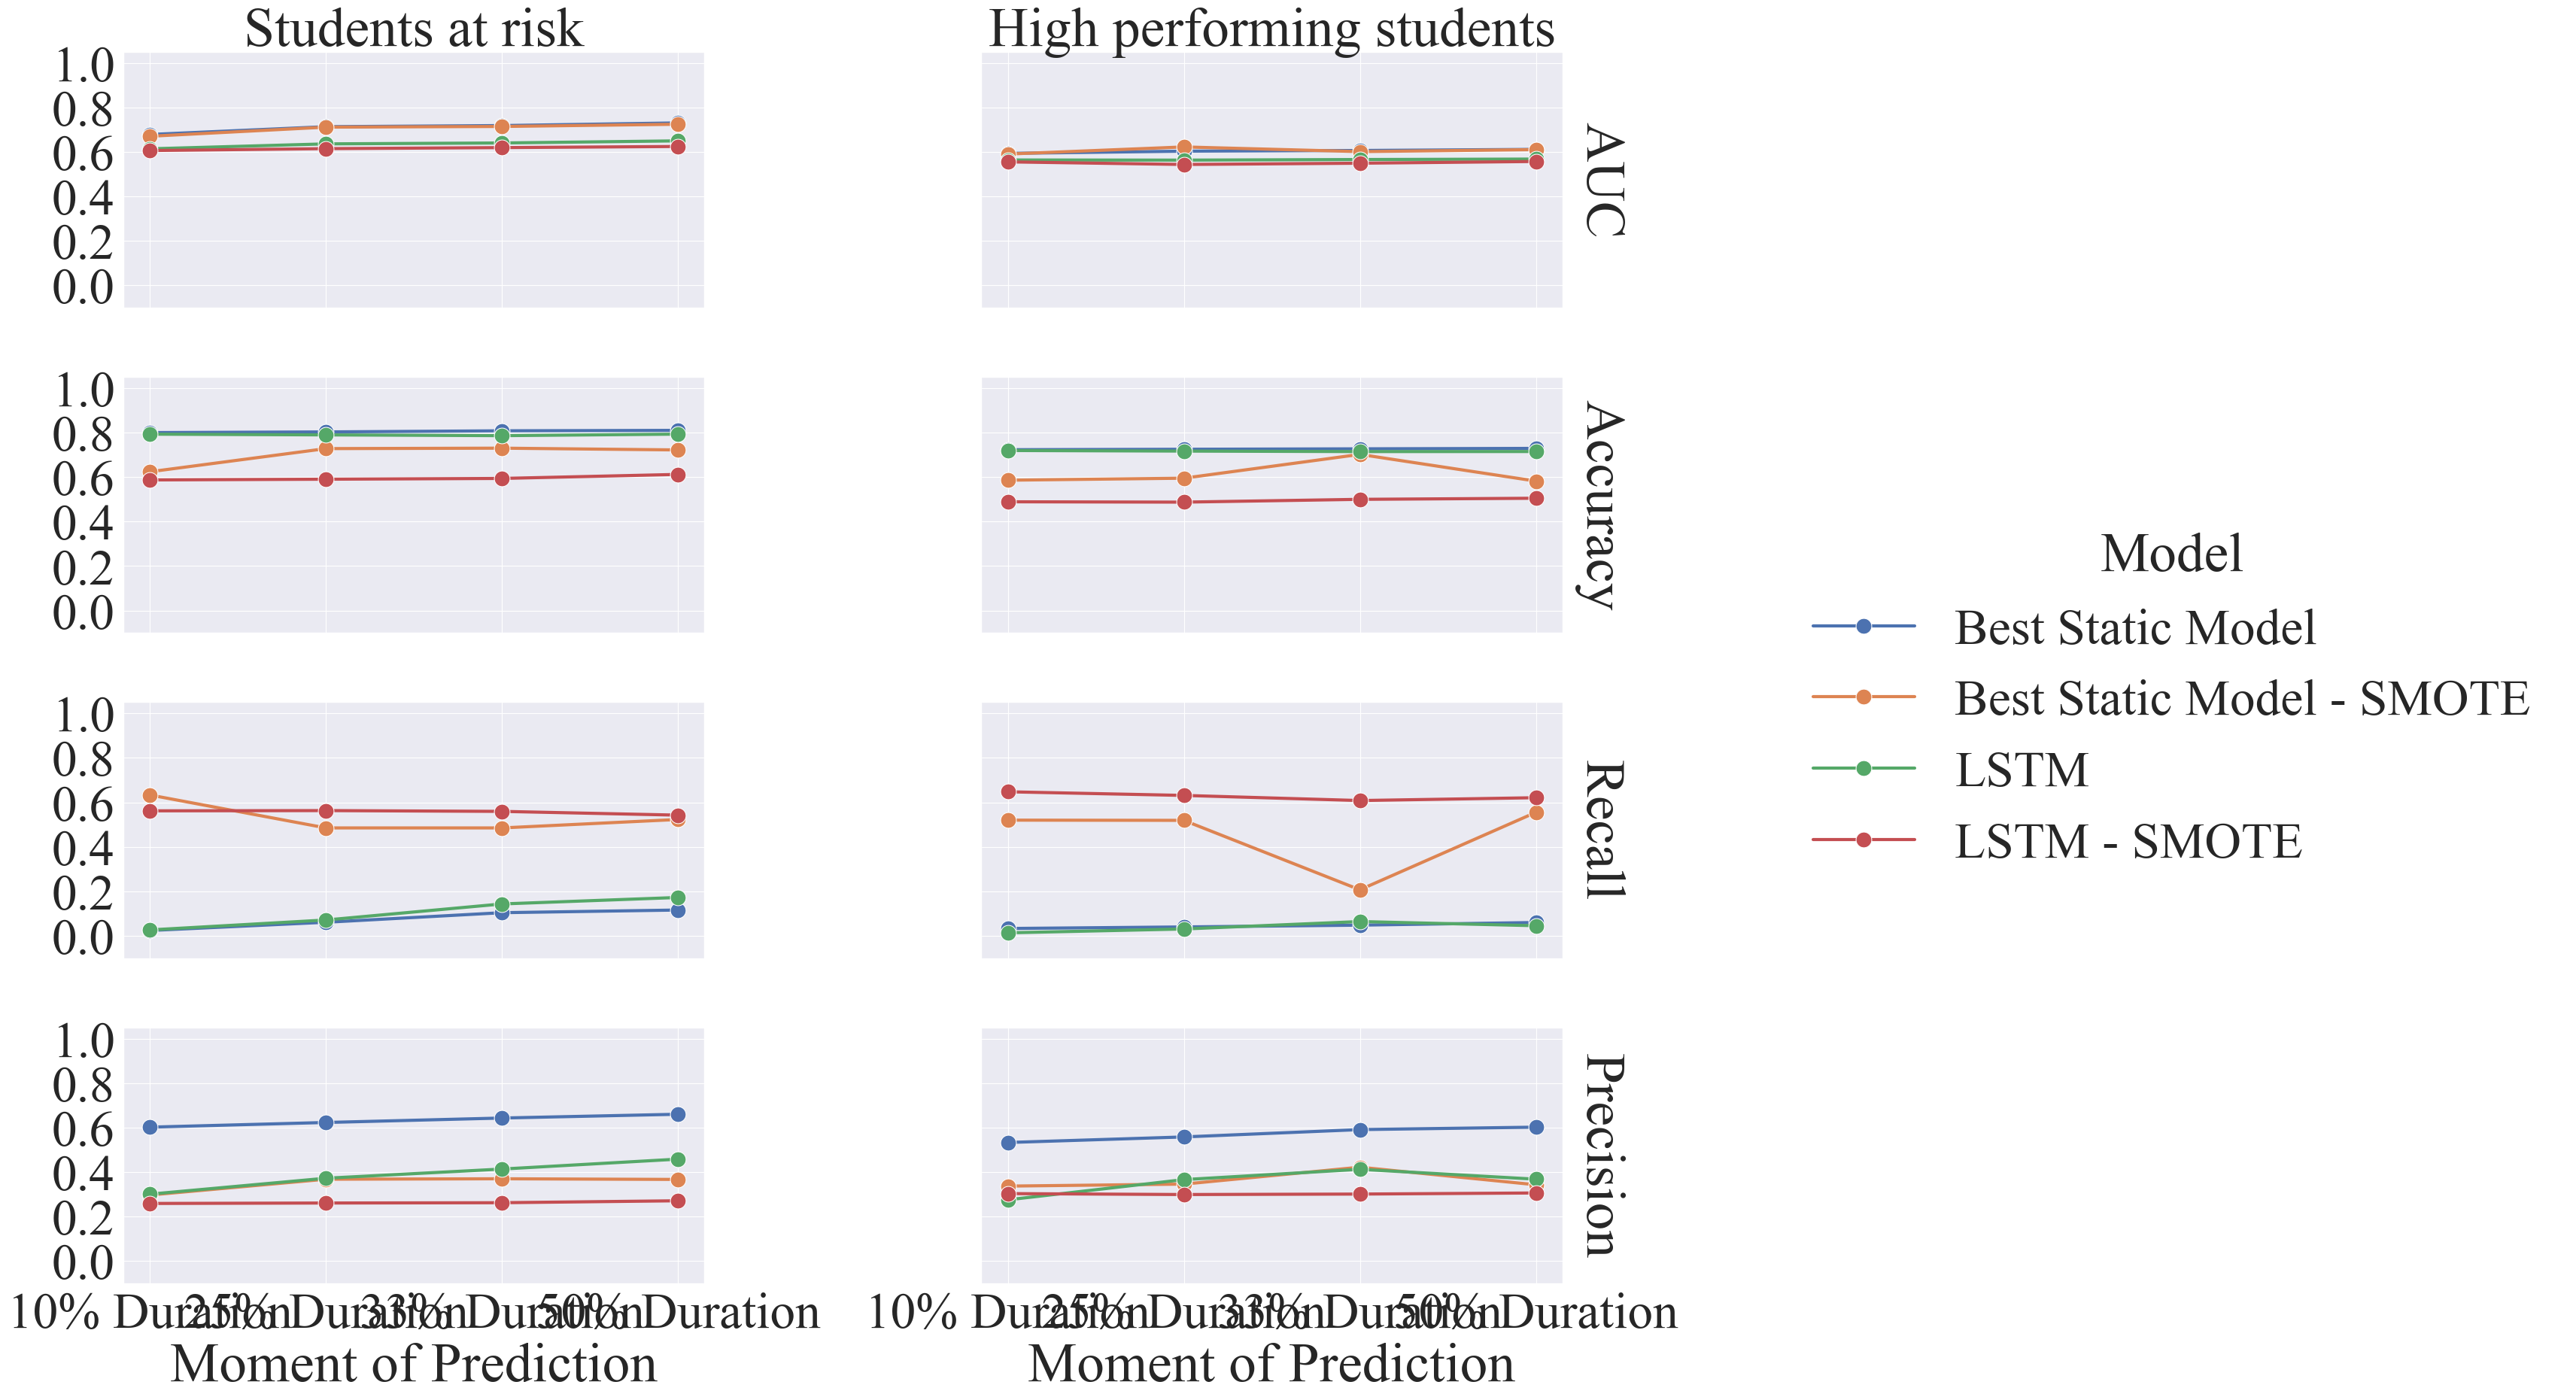

In [10]:
#set seaborn plotting aesthetics
sns.set_theme(context='paper', font='Times New Roman', rc={"figure.figsize":(24, 16)}, font_scale=5.5)


g = sns.FacetGrid(test, col= 'State', row = 'Performance Metric', hue="Model", 
                margin_titles=True, height=5, 
                 aspect= 2.5, ylim = (-0.1,1.05), despine = False, legend_out=True)
                  
g.map(sns.lineplot, 'Moment of prediction', 'Value', linewidth = 3,
     marker = 'o', markersize=15).add_legend()                  
g.set_axis_labels("Moment of Prediction", '')
g.set_titles(col_template="{col_name}", row_template="{row_name}")

g.set(yticks=[0, 0.2, 0.4, 0.6, 0.8, 1])
g.tight_layout()

#plt.savefig("../Images/Model_Performances_IMS_paper.png", dpi=300)

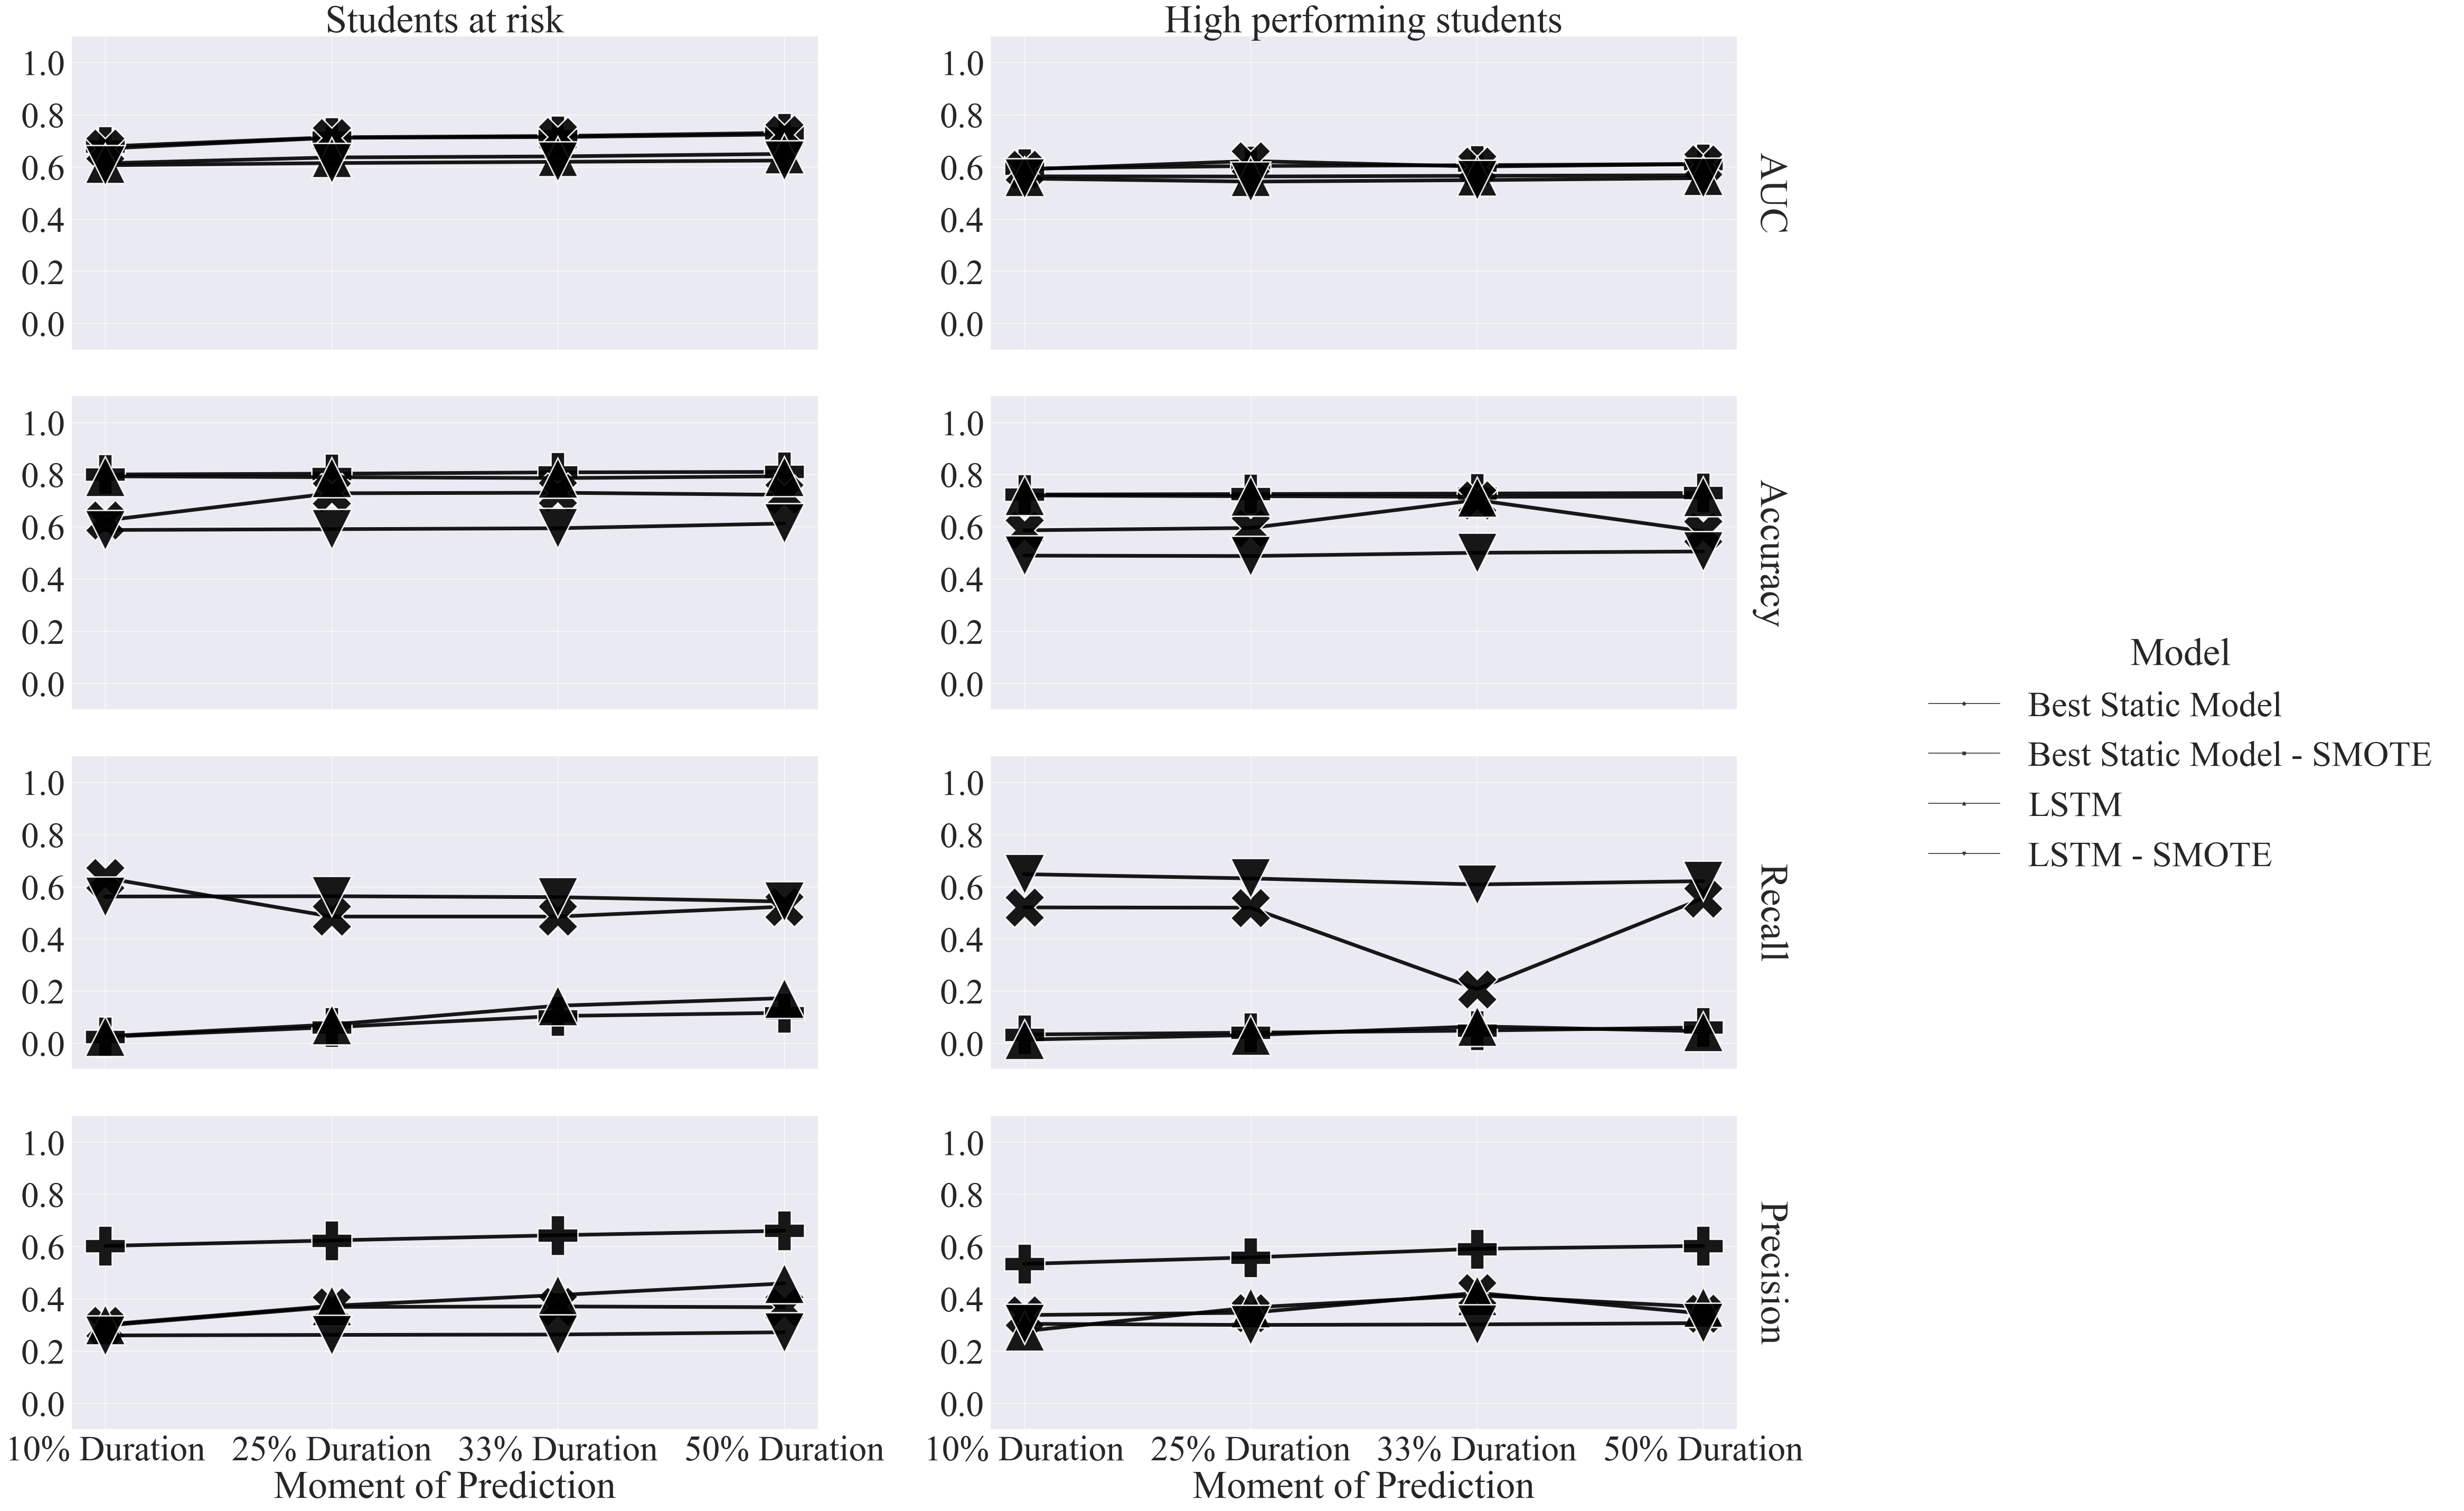

In [11]:
g = sns.relplot(x = 'Moment of prediction', y = 'Value', data=test,
               col='State', row='Performance Metric',
                kind="line", style="Model",
                alpha = 0.90,
                dashes=False,
                hue_order = ['Best Static Model',
                            'Best Static Model - SMOTE',
                           'LSTM',
                           'LSTM - SMOTE'],
                markers=[ "P", "X", "^", "v"],
                markersize=55, linewidth = 5,
               height=7.5, aspect= 2.5,
                markeredgecolor="white",
                markeredgewidth=2,
                facet_kws={"margin_titles": True,
                           'sharey' : False},
               color = 'black',)

g.set_axis_labels("Moment of Prediction", '')
g.set_titles(col_template="{col_name}", row_template="{row_name}")

g.set(ylim = (-0.1, 1.1), yticks=[0, 0.2, 0.4, 0.6, 0.8, 1])
g.tight_layout()

#commenting to avoid overwrite
plt.savefig("../Images/Model_Performances_IMS_symbols_paper_no_assign.png", dpi=300)

### Doing the same for the González work:

In [12]:
#editing

resultados['At-risk - R_Gonz']['State'] = 'At-risk'
resultados['High performing - R_Gonz']['State'] = 'High performing students'

R_G_results = pd.concat([resultados['At-risk - R_Gonz'], resultados['High performing - R_Gonz']])

In [13]:
new_test = R_G_results.melt(id_vars = ['Moment of prediction', 'Model', 'State'], value_vars=['AUROC', 'Accuracy',  
                                                                                                   'Recall', 'Precision'],
                                                                                           var_name = 'Performance Metric',
                                                                                           value_name = 'Value')

new_test = new_test[(new_test['Moment of prediction'] != '100% Duration') & (new_test['Model'].isin(['Best Static Model',
                                                                                    'Best Static Model - SMOTE',
                                                                                    'LSTM',
                                                                                    'LSTM - SMOTE']))]


new_test['Performance Metric'] = new_test['Performance Metric'].str.replace('AUROC', 'AUC') 

In [14]:
new_test = new_test.sort_values(["Moment of prediction", "Model"])

C:\Users\Kisshin\Conda\anaconda3\envs\deep_torch\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Kisshin\Conda\anaconda3\envs\deep_torch\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Kisshin\Conda\anaconda3\envs\deep_torch\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Kisshin\Conda\anaconda3\envs\deep_torch\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Kisshin\Conda\a

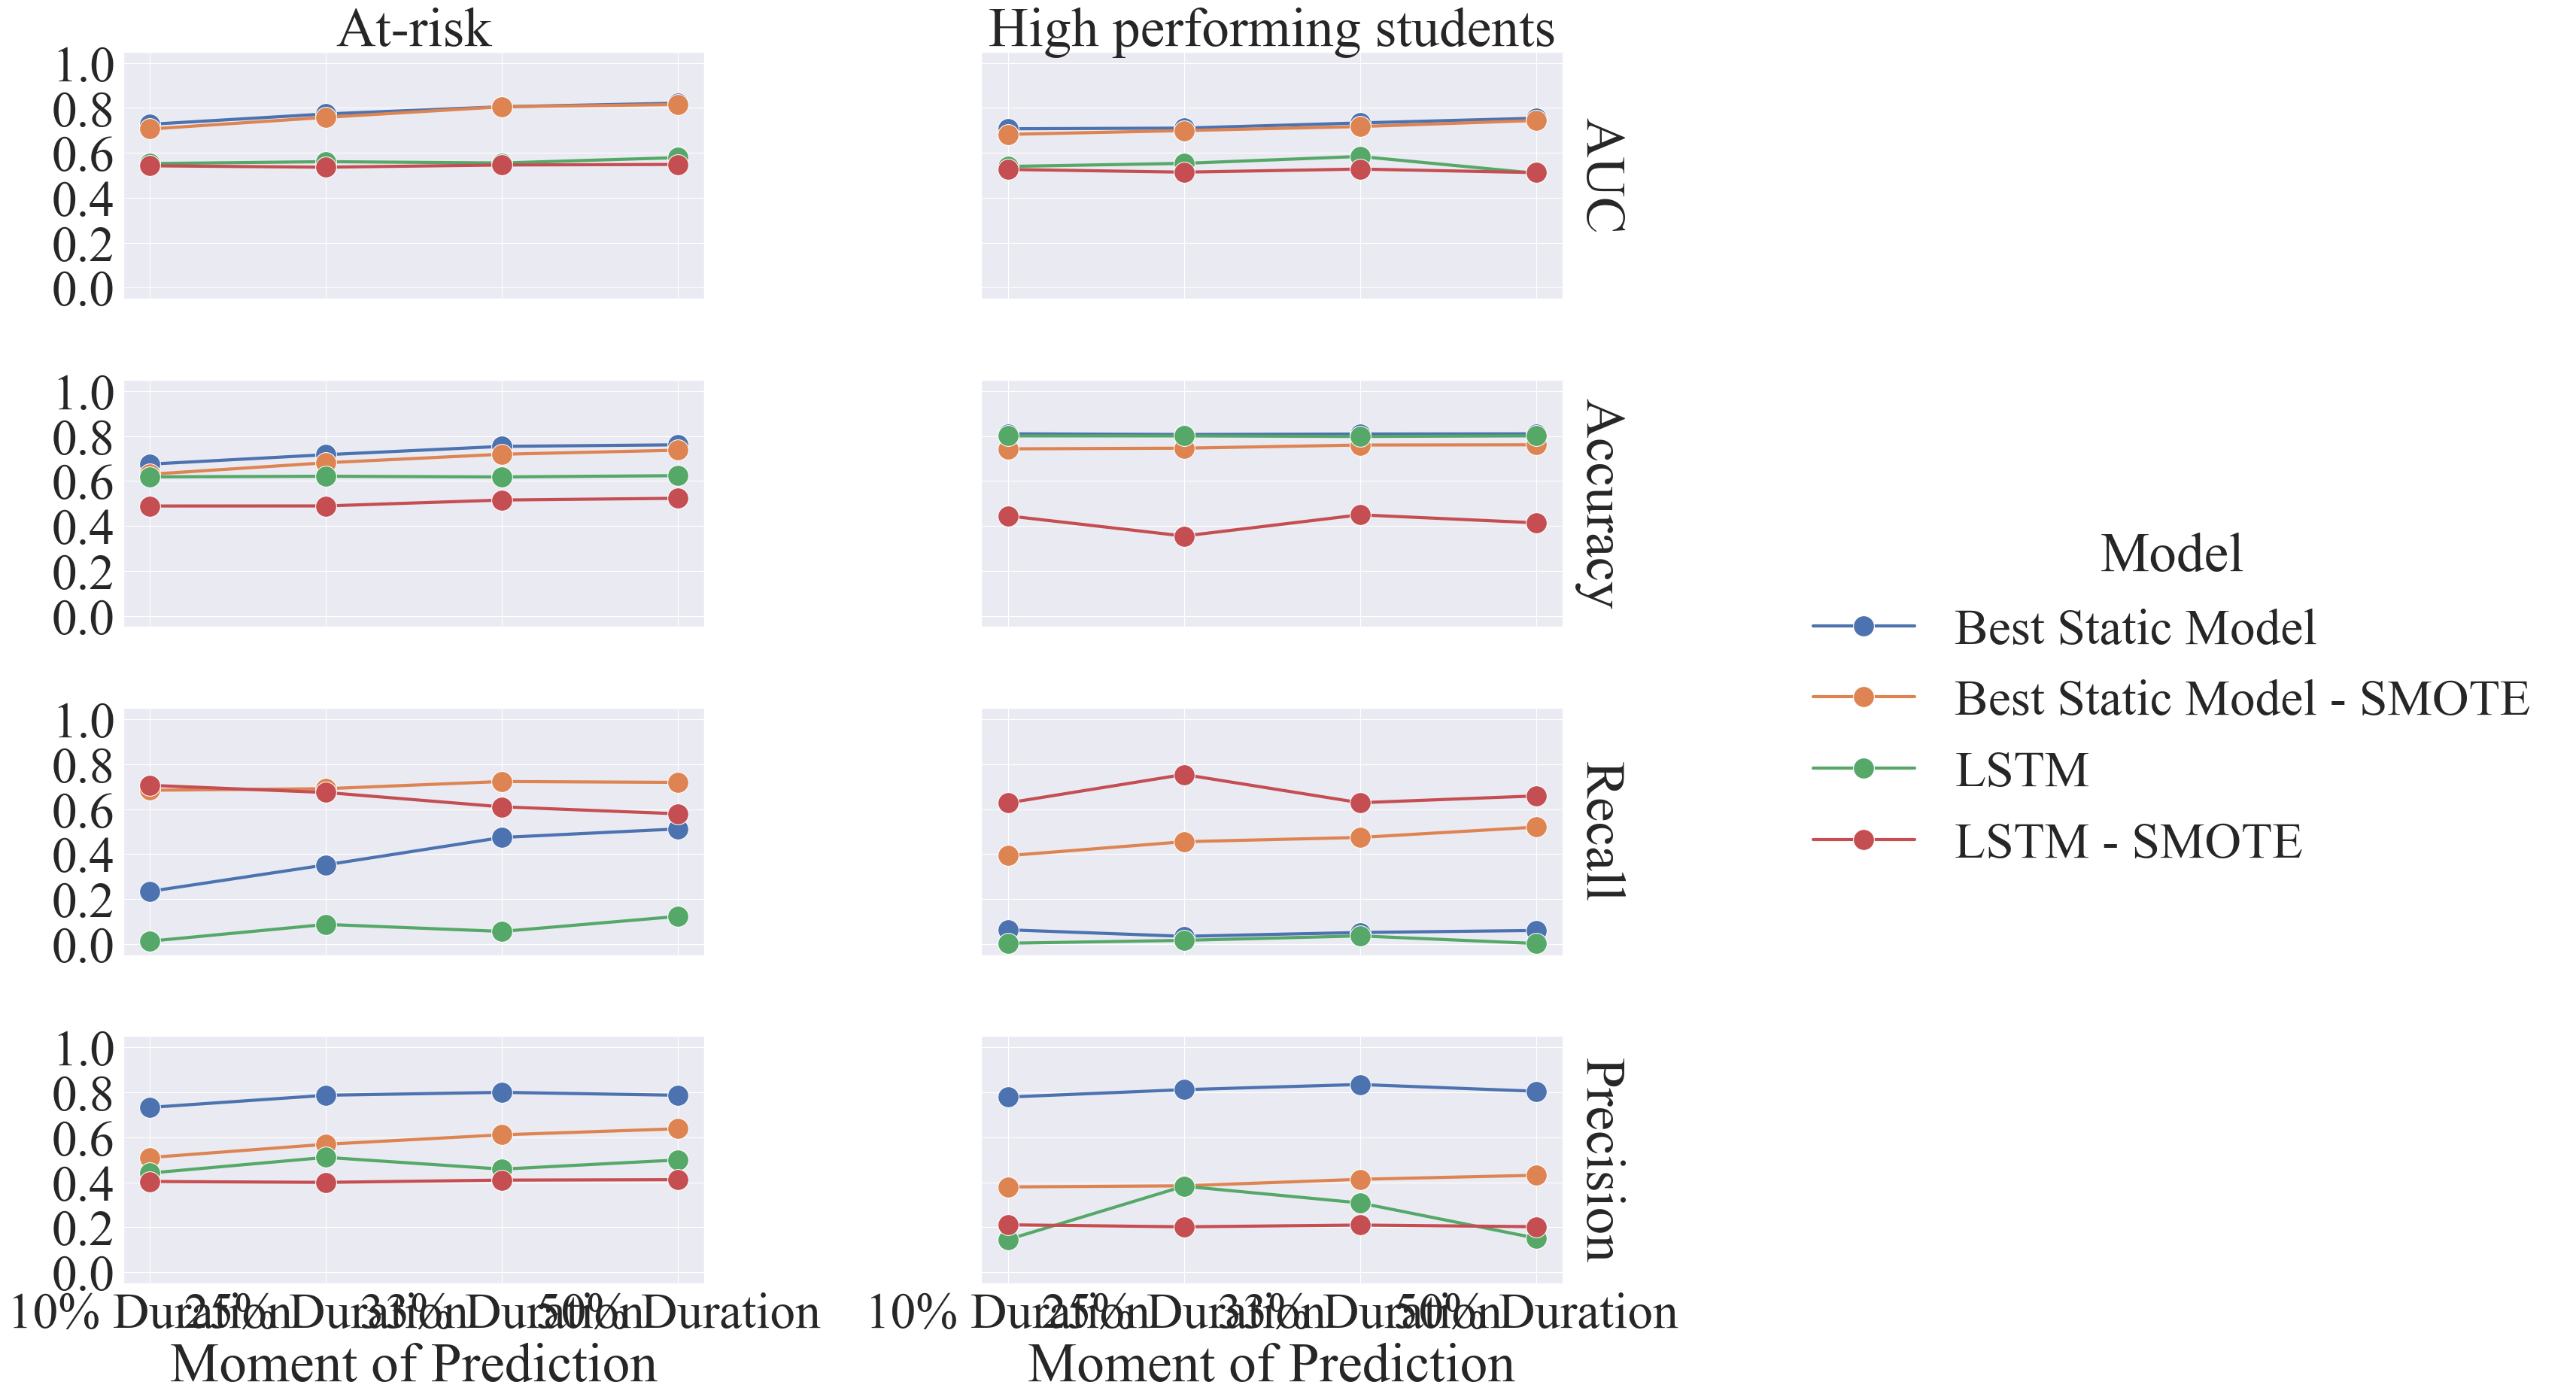

In [15]:
#set seaborn plotting aesthetics
sns.set_theme(context='paper', font='Times New Roman', rc={"figure.figsize":(24, 16)}, font_scale=5.5)


g = sns.FacetGrid(new_test, col= 'State', row = 'Performance Metric', hue="Model", 
                margin_titles=True, height=5, 
                 aspect= 2.5, ylim = (-0.05,1.05), despine = False, legend_out=True)
                  
g.map(sns.lineplot, 'Moment of prediction', 'Value', linewidth = 3,
     marker = 'o', markersize=20).add_legend()                  
g.set_axis_labels("Moment of Prediction", '')
g.set_titles(col_template="{col_name}", row_template="{row_name}")

g.set(yticks=[0, 0.2, 0.4, 0.6, 0.8, 1])
g.tight_layout()

#plt.savefig("../Images/Model_Performances_R_G_paper.png", dpi=300)

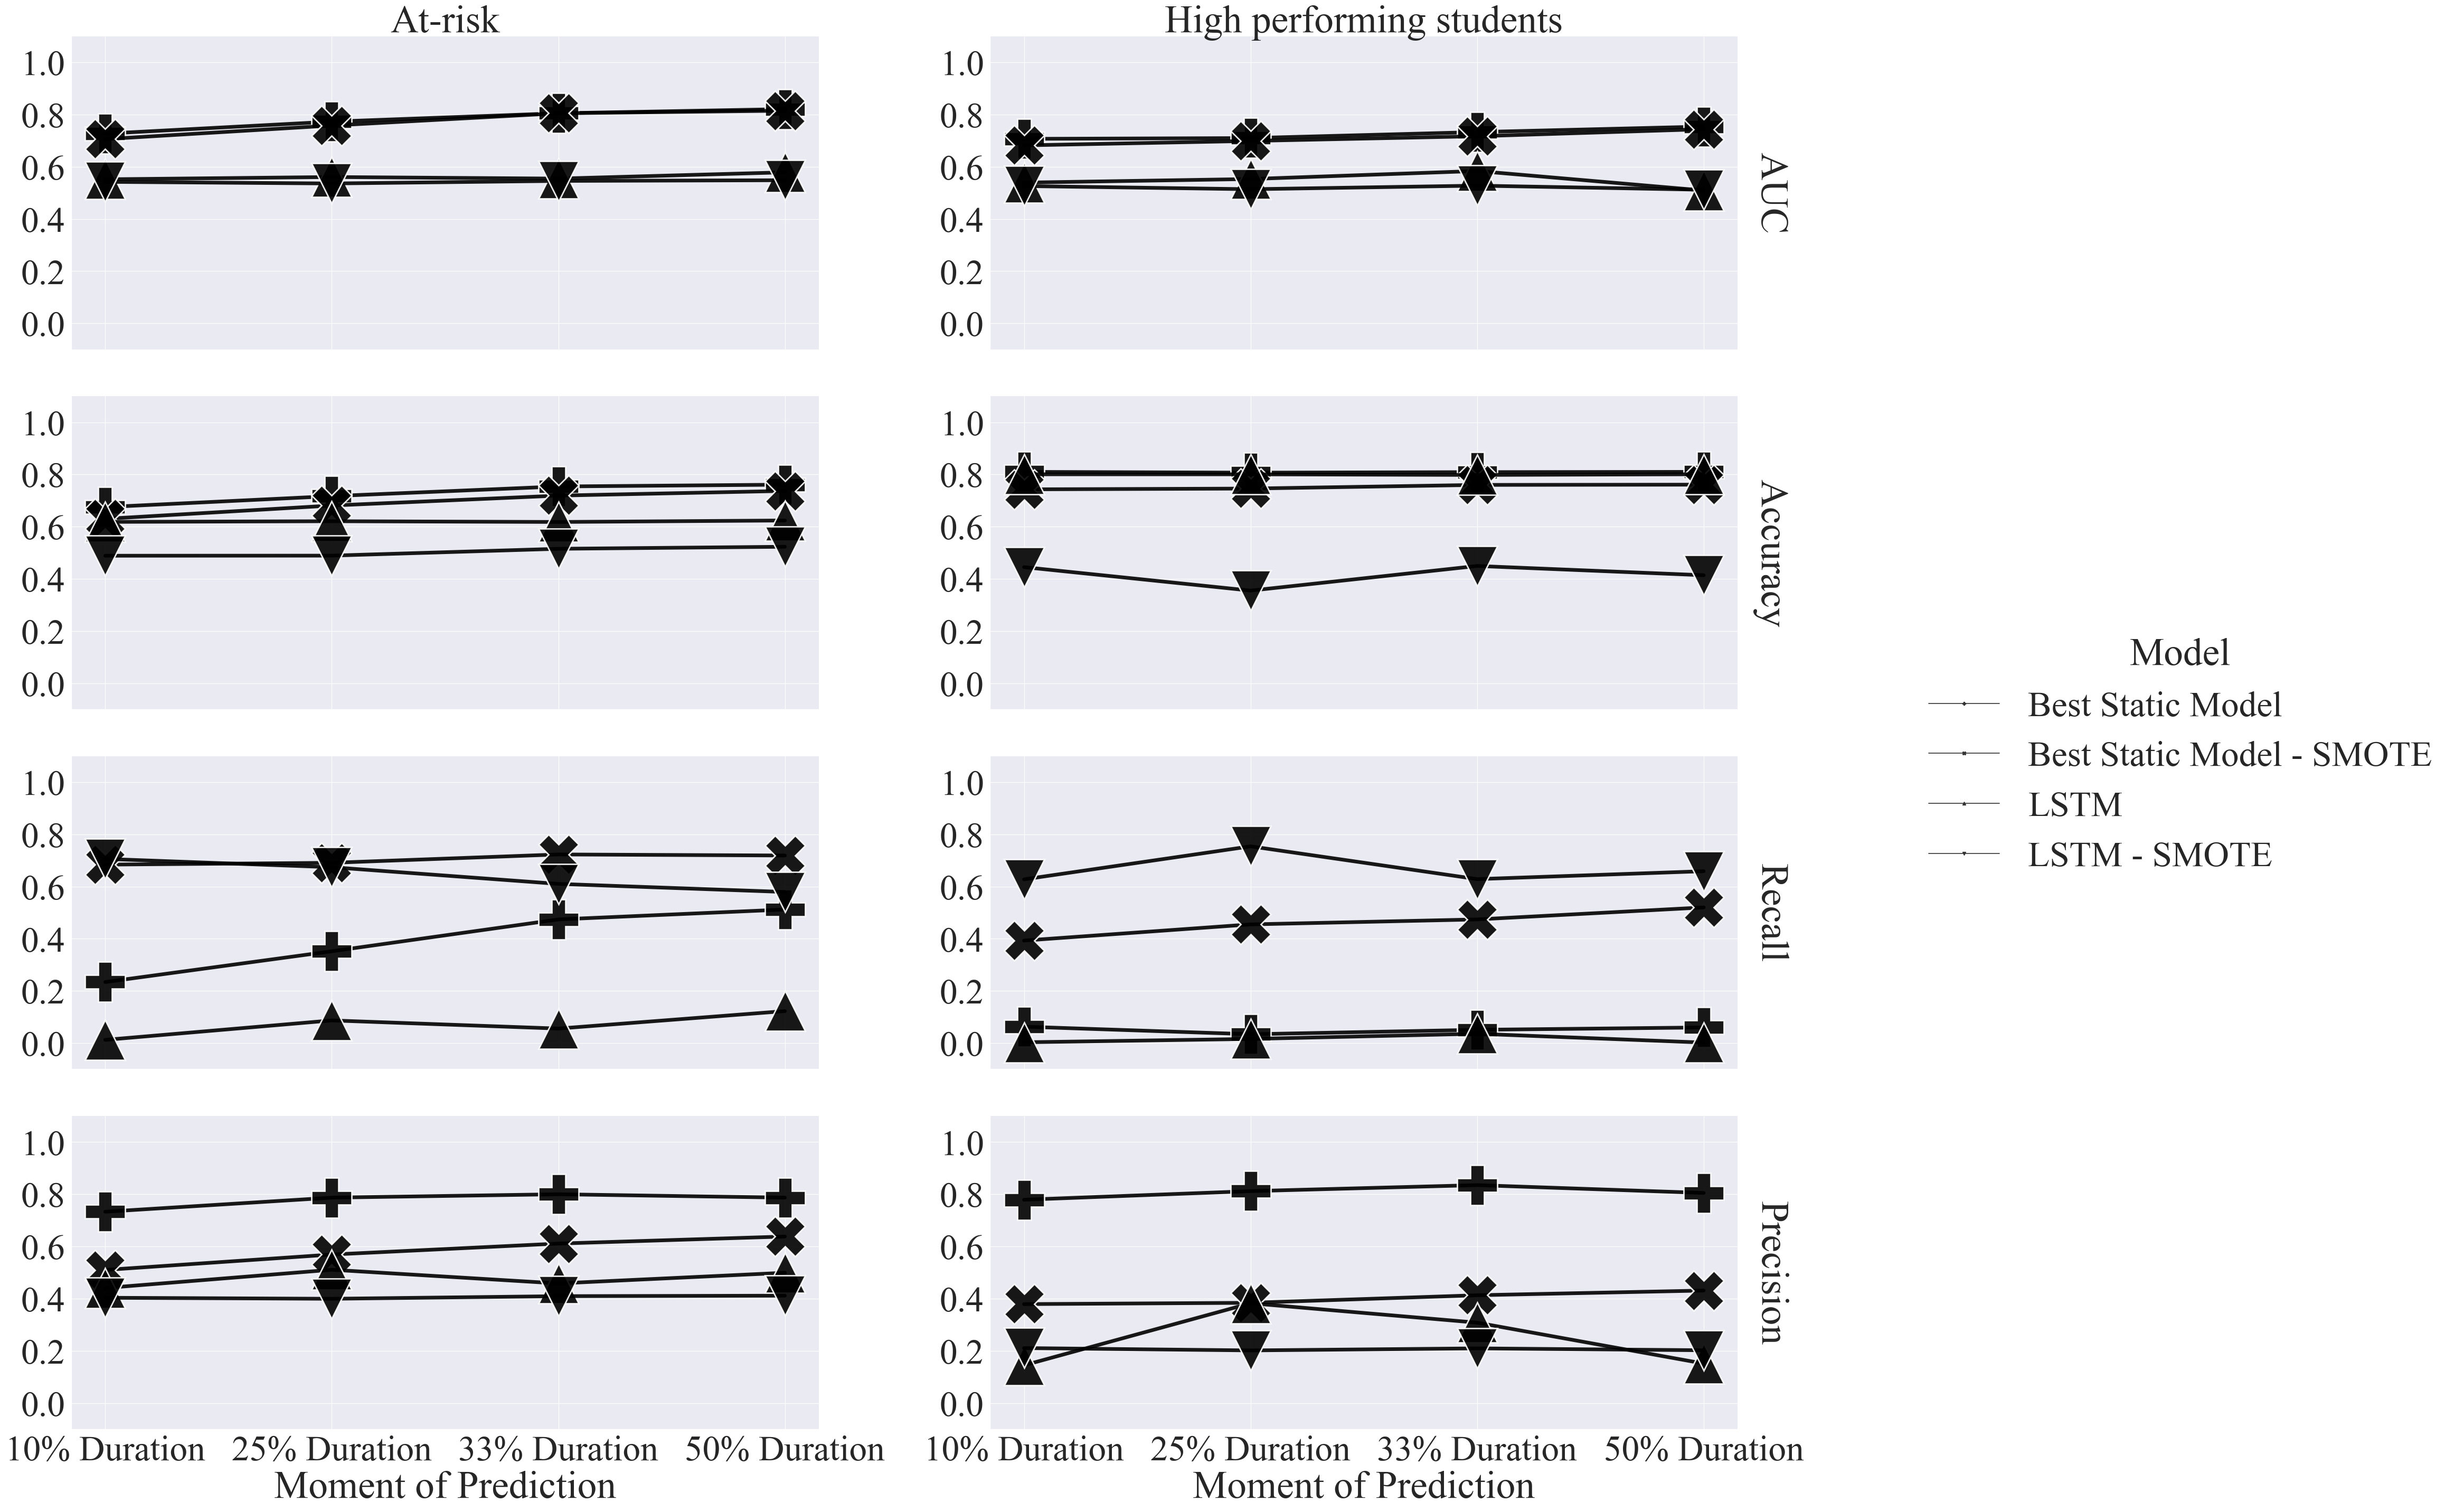

In [16]:
g = sns.relplot(x = 'Moment of prediction', y = 'Value', data=new_test,
               col='State', row='Performance Metric',
                kind="line", style="Model",
                alpha = 0.90,
                dashes=False,
                hue_order = ['Best Static Model',
                            'Best Static Model - SMOTE',
                           'LSTM',
                           'LSTM - SMOTE'],
                markers=[ "P", "X", "^", "v"],
                markersize=55, linewidth = 5,
               height=7.5, aspect= 2.5,
                markeredgecolor="white",
                markeredgewidth=2,
                facet_kws={"margin_titles": True,
                           'sharey' : False},
               color = 'black',)

g.set_axis_labels("Moment of Prediction", '')
g.set_titles(col_template="{col_name}", row_template="{row_name}")

g.set(ylim = (-0.1, 1.1), yticks=[0, 0.2, 0.4, 0.6, 0.8, 1])
g.tight_layout()

#commenting to avoid overwrite
plt.savefig("../Images/Model_Performances_R_G_symbols_paper_no_assign.png", dpi=300)

### Part 2 

Descriptive statistics per course:

1. need to import the original df with the course encoding and the remaining info
2. need to import the actual 50% dataset to obtain the descriptive statistics for each feature

In [17]:
#imports dataframes with 50% logs
dataset_50 = pd.read_excel("../Data/Modeling Stage/Nova_IMS_Non_temporal_datasets.xlsx", 
                                dtype = {
                                    'course_encoding' : int,
                                    'userid' : int},
                               sheet_name = 'Date_threshold_50')

#save tables 
student_list = pd.read_csv('../Data/Modeling Stage/Nova_IMS_Filtered_targets.csv', 
                         dtype = {
                                   'course_encoding': int,
                                   'userid' : int,
                                   })

#obtain original dataset and merge accordingly
original_targets = pd.read_csv('../Data/Modeling Stage/Nova_IMS_targets_table.csv').drop(['Unnamed: 0', 
                                                                                          'exam_mark', 'final_mark', 'ds_discip_pt'], axis = 1)

#import support table to deal with remaining issues related with temporal features
class_list = pd.read_csv('../Data/Modeling Stage/Nova_IMS_updated_classlist.csv', parse_dates = True)
class_list['Days_up_to_50'] = (pd.to_datetime(class_list['Date_threshold_50']) - pd.to_datetime(class_list['Week before start'])).dt.days

#creat dict to correct dates
class_durations = pd.Series(class_list['Days_up_to_50'].values, index= class_list['course_encoding']).to_dict()

#drop unnamed 0 column
#merge with the targets we calculated on the other 
dataset_50 = dataset_50.merge(student_list, on = ['course_encoding', 'userid'], how = 'inner')
dataset_50.drop(['Unnamed: 0', 'exam_mark', 'final_mark'], axis = 1, inplace = True)    
    
#merge with original dataset
dataset_50 = pd.merge(dataset_50, original_targets, on = ['cd_curso', 'semestre', 'courseid', 'userid'])

#convert results to object and need to convert column names to string
dataset_50['course_encoding'], dataset_50['userid'] = dataset_50['course_encoding'].astype(object), dataset_50['userid'].astype(object)
dataset_50['Level'] = dataset_50['nm_curso_pt'].apply(lambda x: x.split(' ')[0])

#Fill nas on following columns
dataset_50['Number of clicks'] = dataset_50['Number of clicks'].fillna(0)
dataset_50['Number of sessions'] = dataset_50['Number of sessions'].fillna(0)
dataset_50['Total time online (min)'] = dataset_50['Total time online (min)'].fillna(0)
dataset_50['Clicks per day'] = dataset_50['Clicks per day'].fillna(0)
dataset_50['Days with no interaction (%)'] = dataset_50['Days with no interaction (%)'].fillna(100) 
dataset_50['Clicks (% of course total)'] = dataset_50['Clicks (% of course total)'].fillna(0)

#largest period of inactivity
dataset_50['Largest period of inactivity (h)'] = np.where(dataset_50['Largest period of inactivity (h)'].isna(), 
                                                       dataset_50['course_encoding'].map(class_durations) * 24,
                                                       dataset_50['Largest period of inactivity (h)'])

#number of days without clicking
dataset_50['Days with no interaction'] = np.where(dataset_50['Days with no interaction'].isna(), 
                                                       dataset_50['course_encoding'].map(class_durations),
                                                       dataset_50['Days with no interaction'])

Using a groupby per program level to obtain the most relevant descriptive statistics. 

In [18]:
dataset_50.groupby(['Level', 'exam_fail']).agg({
                                'course_encoding' : 'nunique',
                                'nm_curso_pt' : 'nunique',
                                 'userid' : ['nunique', 'count'],
                                })

course_encoding nm_curso_pt  userid      
                                nunique     nunique nunique count
Level         exam_fail                                          
Licenciatura  0                      55           2     362  2469
              1                      55           2     286   918
Mestrado      0                      62           6     786  4180
              1                      62           6     437   833
Pós-Graduação 0                      21           6     304   775
              1                      21           6      82   121

In [19]:
dataset_50.describe().T

,count,mean,std,min,25%,50%,75%,max
cd_curso,9296.0,7891.340146,2036.308851,859.000000,7512.000000,9155.000000,9434.000000,9435.000000
courseid,9296.0,180822.354346,81881.938686,100001.000000,100073.000000,200101.000000,200193.000000,400131.000000
Number of clicks,9296.0,129.635219,97.983796,0.000000,65.000000,109.000000,169.000000,1546.000000
Number of sessions,9296.0,31.418029,22.310633,0.000000,17.000000,27.000000,40.000000,307.000000
Largest period of inactivity (h),9296.0,277.876470,180.521260,0.000000,167.316667,239.950000,335.737500,1944.000000
Total time online (min),9296.0,238.704066,210.499035,0.000000,93.000000,191.000000,324.000000,3917.000000
Average session duration (min),9266.0,7.422052,4.203705,0.000000,4.571429,6.918904,9.666667,69.000000
Start of Session 1 (%),9266.0,2.509766,7.739658,-11.666667,-1.666667,0.000000,5.109489,53.284672
Start of Session 2 (%),9226.0,4.889705,8.103853,-11.666667,0.000000,2.189781,7.299270,53.284672
Start of Session 3 (%),9181.0,6.864748,8.667187,-10.000000,0.729927,5.000000,10.218978,54.320988


In [20]:
len(student_list['userid'].unique())

1590

### Repeat for the 100 duration for END

Obtaion descriptive statistics for both classification problems (i.e. The number of students that are excelling)

In [21]:
#imports dataframes with 50% logs
dataset_100 = pd.read_excel("../Data/Modeling Stage/Nova_IMS_Non_temporal_datasets.xlsx", 
                                dtype = {
                                    'course_encoding' : int,
                                    'userid' : int},
                               sheet_name = 'Date_threshold_100')

#save tables 
student_list = pd.read_csv('../Data/Modeling Stage/Nova_IMS_Filtered_targets.csv', 
                         dtype = {
                                   'course_encoding': int,
                                   'userid' : int,
                                   })

#obtain original dataset and merge accordingly
original_targets = pd.read_csv('../Data/Modeling Stage/Nova_IMS_targets_table.csv').drop(['Unnamed: 0', 
                                                                                          'exam_mark', 'final_mark', 'ds_discip_pt'], axis = 1)

#import support table to deal with remaining issues related with temporal features
class_list = pd.read_csv('../Data/Modeling Stage/Nova_IMS_updated_classlist.csv', parse_dates = True)
class_list['Days_up_to_100'] = (pd.to_datetime(class_list['Date_threshold_100']) - pd.to_datetime(class_list['Week before start'])).dt.days

#creat dict to correct dates
class_durations = pd.Series(class_list['Days_up_to_100'].values, index= class_list['course_encoding']).to_dict()

#drop unnamed 0 column
#merge with the targets we calculated on the other 
dataset_100 = dataset_100.merge(student_list, on = ['course_encoding', 'userid'], how = 'inner')
dataset_100.drop(['Unnamed: 0', 'exam_mark', 'final_mark'], axis = 1, inplace = True)    
    
#merge with original dataset
dataset_100 = pd.merge(dataset_100, original_targets, on = ['cd_curso', 'semestre', 'courseid', 'userid'])

#convert results to object and need to convert column names to string
dataset_100['course_encoding'], dataset_100['userid'] = dataset_100['course_encoding'].astype(object), dataset_100['userid'].astype(object)
dataset_100['Level'] = dataset_100['nm_curso_pt'].apply(lambda x: x.split(' ')[0])

#Fill nas on following columns
dataset_100['Number of clicks'] = dataset_100['Number of clicks'].fillna(0)
dataset_100['Number of sessions'] = dataset_100['Number of sessions'].fillna(0)
dataset_100['Total time online (min)'] = dataset_100['Total time online (min)'].fillna(0)
dataset_100['Clicks per day'] = dataset_100['Clicks per day'].fillna(0)
dataset_100['Days with no interaction (%)'] = dataset_100['Days with no interaction (%)'].fillna(100) 
dataset_100['Clicks (% of course total)'] = dataset_100['Clicks (% of course total)'].fillna(0)

#largest period of inactivity
dataset_100['Largest period of inactivity (h)'] = np.where(dataset_100['Largest period of inactivity (h)'].isna(), 
                                                       dataset_100['course_encoding'].map(class_durations) * 24,
                                                       dataset_100['Largest period of inactivity (h)'])

#number of days without clicking
dataset_100['Days with no interaction'] = np.where(dataset_100['Days with no interaction'].isna(), 
                                                       dataset_100['course_encoding'].map(class_durations),
                                                       dataset_100['Days with no interaction'])

Obtain descriptive statistics for each problem.

In [22]:
dataset_100

,course_encoding,cd_curso,semestre,courseid,userid,Number of clicks,Number of sessions,Largest period of inactivity (h),Total time online (min),Average session duration (min),...,Clicks per day,Clicks per session,Clicks (% of course total),Submissions (% of course total),Days with no interaction (%),Average grade of assignments,exam_fail,exam_gifted,nm_curso_pt,Level
0,0,4281,S1,200101,417,234,58,542.650000,284.0,4.896552,...,1.549669,4.034483,1.312910,NaN,66.887417,NaN,0,0,Mestrado em Estatística e Gestão de Informação,Mestrado
1,0,4281,S1,200101,1042,279,71,217.250000,614.0,8.647887,...,1.847682,3.929577,1.565393,NaN,61.589404,NaN,0,0,Mestrado em Estatística e Gestão de Informação,Mestrado
2,0,4281,S1,200101,1100,243,53,384.933333,258.0,4.867925,...,1.609272,4.584906,1.363407,NaN,68.874172,NaN,0,0,Mestrado em Estatística e Gestão de Informação,Mestrado
3,0,4281,S1,200101,2674,200,32,378.000000,260.0,8.125000,...,1.324503,6.250000,1.122146,NaN,74.834437,NaN,0,0,Mestrado em Estatística e Gestão de Informação,Mestrado
4,0,4281,S1,200101,3802,243,46,366.000000,389.0,8.456522,...,1.609272,5.282609,1.363407,NaN,73.509934,NaN,0,0,Mestrado em Estatística e Gestão de Informação,Mestrado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9291,180,9435,S2,200188,6578,126,19,1005.783333,87.0,4.578947,...,0.834437,6.631579,1.385224,NaN,82.781457,15.546667,0,0,Mestrado em Data-Driven Marketing,Mestrado
9292,180,9435,S2,200188,6635,240,47,503.633333,410.0,8.723404,...,1.589404,5.106383,2.638522,NaN,68.874172,13.333333,0,0,Mestrado em Data-Driven Marketing,Mestrado
9293,180,9435,S2,200188,6650,189,34,333.883333,161.0,4.735294,...,1.251656,5.558824,2.077836,15.384615,72.847682,15.076667,0,0,Mestrado em Data-Driven Marketing,Mestrado
9294,180,9435,S2,200188,6658,199,33,503.850000,155.0,4.696970,...,1.317881,6.030303,2.187775,NaN,74.172185,14.826667,0,0,Mestrado em Data-Driven Marketing,Mestrado


In [22]:
dataset_100.groupby(['Level', 'exam_gifted']).agg({
                                'course_encoding' : 'nunique',
                                'nm_curso_pt' : 'nunique',
                                 'userid' : ['nunique', 'count'],
                                })

course_encoding nm_curso_pt  userid      
                                  nunique     nunique nunique count
Level         exam_gifted                                          
Licenciatura  0                        55           2     406  2618
              1                        55           2     302   769
Mestrado      0                        62           6     834  3470
              1                        62           6     623  1543
Pós-Graduação 0                        21           6     301   634
              1                        21           6     187   262

# Part 3

Obtaining relevant figures to show results:

Figure 1 - bar plot of the Performance Metrics for all Models.

In [23]:
#import results with SMOTE and only keep models of interest for conf paper
results_50 = pd.read_excel("../Data/Modeling Stage/Results/IMS/Non temporal models/simple_models_no_assign_results_Date_threshold_50_30_replicas_SMOTE.xlsx", 
                               sheet_name = 'exam_fail').drop(['Baseline - Majority Class', 'BNB', 'J48 DT', 'RF', 'AdaBoost', 'GBoost' ,'ExtraTree'], axis = 1)

#rename
results_50 = results_50.rename(columns = {
                                        'Unnamed: 0' : 'Metric',
                                        'NN' : 'MLP'
                                        })

We will need to apply some important transformations to the data (thanks CHATGPT) 

The first will be to separate means and standard deviations

In [24]:
# If the string does not contain the "+/-" symbol, return the mean value as the first element of the tuple and 0 as the second element
extract_values = lambda x: (float(x.split('+/-')[0]) if "+/-" in x else float(x),
                            float(x.split('+/-')[1]) if "+/-" in x else 0)

# Iterate over the columns of the DataFrame, excluding the first column
for col in results_50.columns[1:]:
    # Create new columns for the mean and standard deviation values
    mean_col = 'Mean ' + col
    std_dev_col = 'Std Dev ' + col
    
    # Apply the lambda function to the column and store the results in the new columns
    results_50[mean_col], results_50[std_dev_col] = zip(*results_50[col].apply(extract_values))
    
    #drop column
    results_50.drop(col, axis = 1, inplace = True)
    
#st column val accuracy and train accuracy with the standard deviations of AUC
train_auc = results_50.loc[9, results_50.columns.str.startswith('Std Dev')]
val_auc = results_50.loc[10, results_50.columns.str.startswith('Std Dev')]

#update row 0 and 1
results_50.loc[0, results_50.columns.str.startswith('Std Dev')] = train_auc
results_50.loc[1, results_50.columns.str.startswith('Std Dev')] = val_auc

# Melt the DataFrame, specifying the 'Metric' column as the index and all other columns
melted_df = results_50.melt(id_vars='Metric', value_vars= results_50.columns[1:],
                    var_name='Model', value_name='Value')

# Create a new column  two new columns in the melted DataFrame, 'Type' by extracting the first word from the '~Model' column
melted_df['Type'] = melted_df.apply(lambda x: x['Model'].split(' ')[0], axis=1)

# Remove the references to Mean and Std Dev in Variable column
melted_df['Model'] = melted_df['Model'].str.replace(r'(Mean|Std Dev)', '', regex=True)

In [25]:
#now setting rows to remove: we are only interested in the values for validation
melted_df = melted_df[melted_df['Metric'].str.contains('Validation')]

# And now, for plotting purposes, remove all references to work validation
melted_df['Metric'] = melted_df['Metric'].str.replace(r'(Validation| - )', '', regex=True)

In [26]:
#need to create a pivot before having this finally be ready
pivot_results = pd.pivot_table(data = melted_df, index=['Metric','Model'], columns = 'Type', values = 'Value').reset_index()

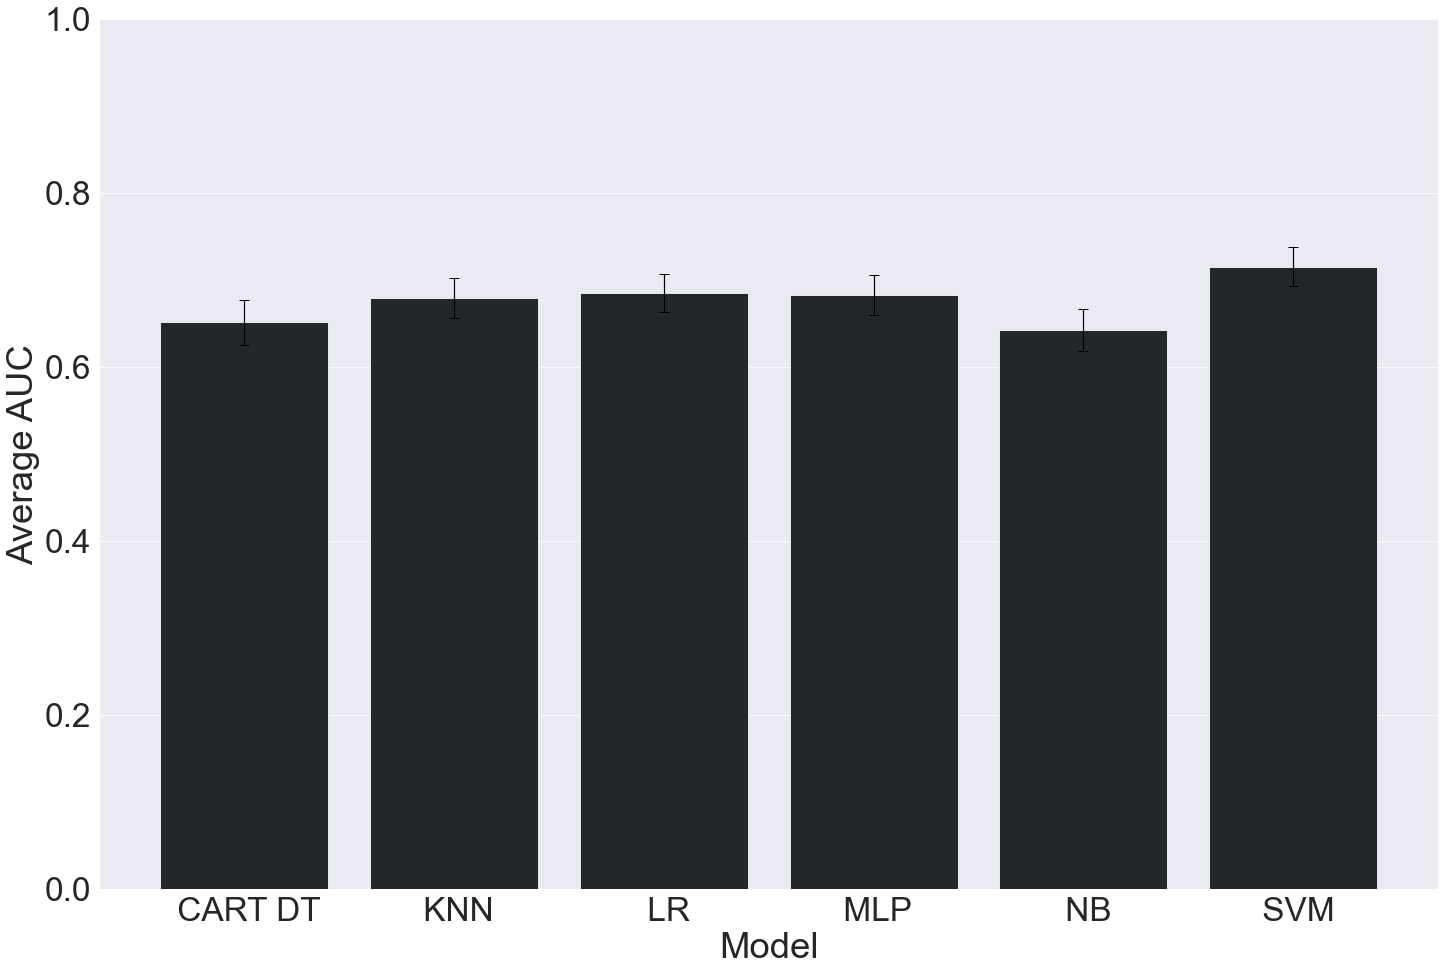

In [27]:
#set seaborn plotting aesthetics
sns.set_theme(context='paper', font='Arial', rc={"figure.figsize":(24, 16)}, font_scale=3.8)

AUC_plot = pivot_results[pivot_results['Metric'] == 'AUC'].reset_index(drop = True)

# Create the bar chart
sns.barplot(x="Model", y="Mean", data=AUC_plot, color='#21272b')

# Add the error bars to the chart
for i in range(len(AUC_plot)):
    plt.errorbar(i, AUC_plot.loc[i, "Mean"], yerr=AUC_plot.loc[i, "Std"], capsize=5, fmt='none', ecolor='black')

# Set the chart labels and title
plt.xlabel("Model")
plt.ylabel("Average AUC")

# Set the limits of the y-axis
plt.ylim(0, 1)

#commenting to avoid overwrite
plt.savefig("../Images/INTED_Avg_AUC.png", dpi=300)